#### Observations :
#### ASSUMPTIONS IN MULTILINEAR REGRESSION :-
- Linearity : The relationship between the predictors and the response in linear.
- Independence : Observation are independent of each other.
- Homoscedasticity : The residual (differences between observed and predicted values) exhibit constant variance at all levels of the predictor .
- Normal Distribution of Errors : The residual of the model are normally distrubuted.
- No multicollinearity : The independent variables should not be too highly correlated with each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
cars = pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars = pd.DataFrame(cars,columns = ['HP','VOL','SP','WT','MPG'])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of columns: 
- MPG : Mileage of the car (MILES PER GALLON)
- HP  : Horse power of the car
- VOL : Volume of the car( SIZE)
- SP  : Top speed of the car (MILES PER HOUR)
- WT  : Weight of the car (POUNDS)


###### EDA 

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations :
- No missing values are observed here 
- The data typesof the columns are relevant and valid
-  There are 81 observations

C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


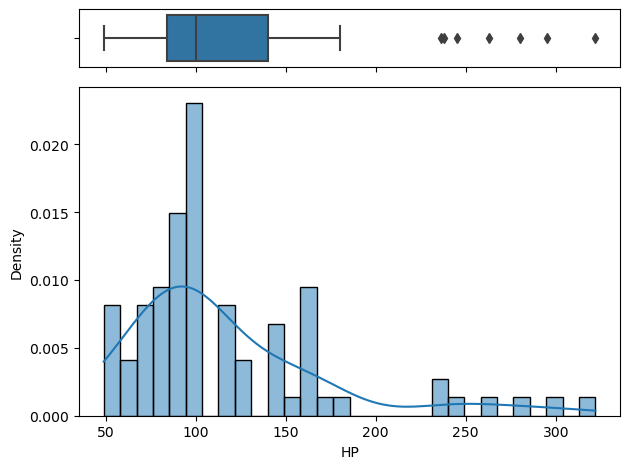

In [6]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios' : (.15,.85)})
sns.boxplot(data = cars,x = 'HP',ax = ax_box,orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars,x = 'HP',ax = ax_hist,bins = 30,kde = True,stat = 'density')
ax_hist.set(ylabel = 'Density')
plt.tight_layout()
plt.show()

C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


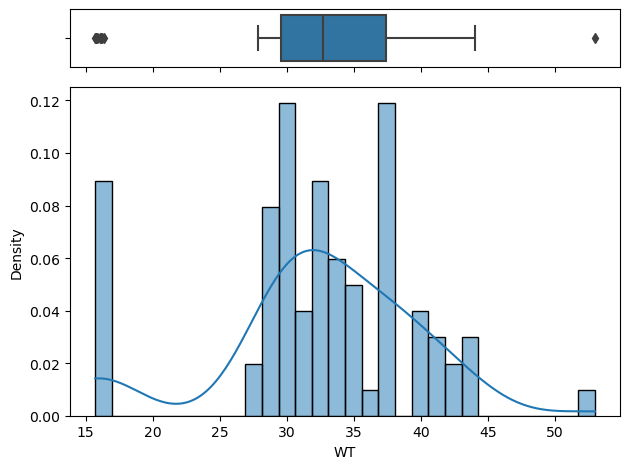

In [8]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios' : (.15,.85)})
sns.boxplot(data = cars,x = 'WT',ax = ax_box,orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars,x = 'WT',ax = ax_hist,bins = 30,kde = True,stat = 'density')
ax_hist.set(ylabel = 'Density')
plt.tight_layout()
plt.show()

C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


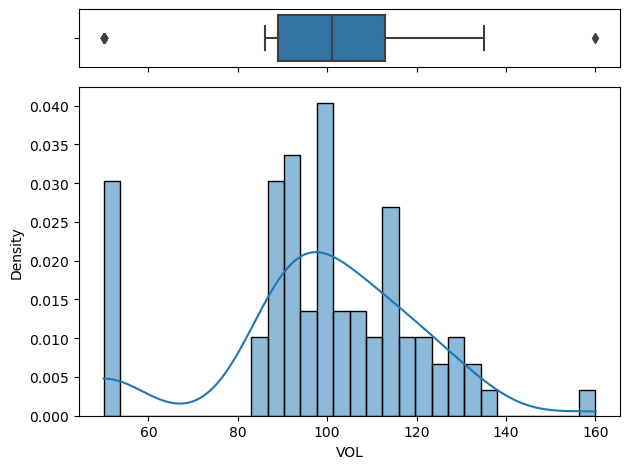

In [9]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios' : (.15,.85)})
sns.boxplot(data = cars,x = 'VOL',ax = ax_box,orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars,x = 'VOL',ax = ax_hist,bins = 30,kde = True,stat = 'density')
ax_hist.set(ylabel = 'Density')
plt.tight_layout()
plt.show()

C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


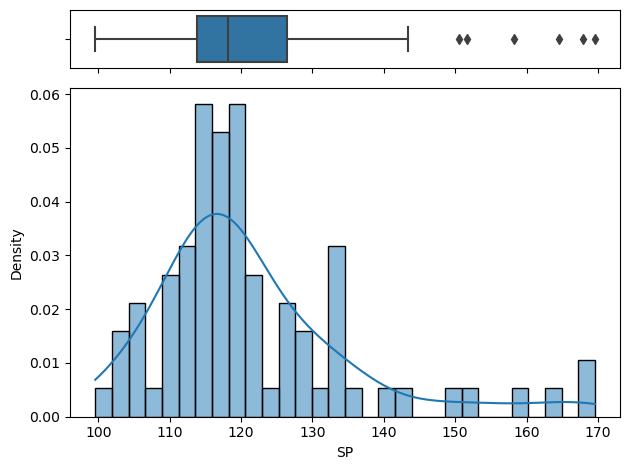

In [10]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios' : (.15,.85)})
sns.boxplot(data = cars,x = 'SP',ax = ax_box,orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars,x = 'SP',ax = ax_hist,bins = 30,kde = True,stat = 'density')
ax_hist.set(ylabel = 'Density')
plt.tight_layout()
plt.show()

C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


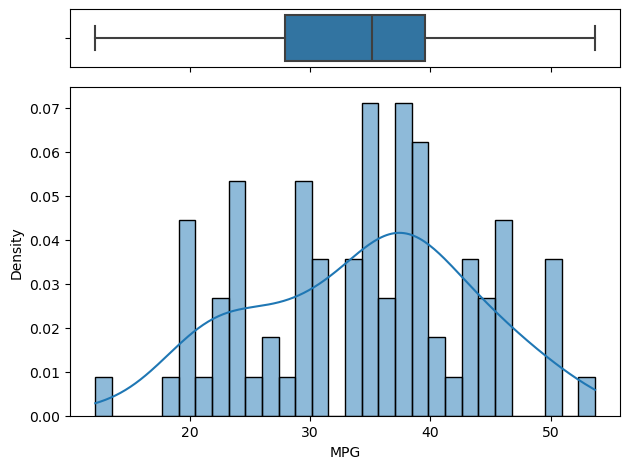

In [11]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios' : (.15,.85)})
sns.boxplot(data = cars,x = 'MPG',ax = ax_box,orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars,x = 'MPG',ax = ax_hist,bins = 30,kde = True,stat = 'density')
ax_hist.set(ylabel = 'Density')
plt.tight_layout()
plt.show()

#### Observations from boxlot and histogram :
- There are some extreme values(outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns,a few outliers areobserved in both tails of their distributions.
- The extrema values of cars data may have come from the specially designed nature of cars.
- As this is multi_dimensional data, the outliers with respect to spatial dimensions ma have to be considered while building the regression model

In [16]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

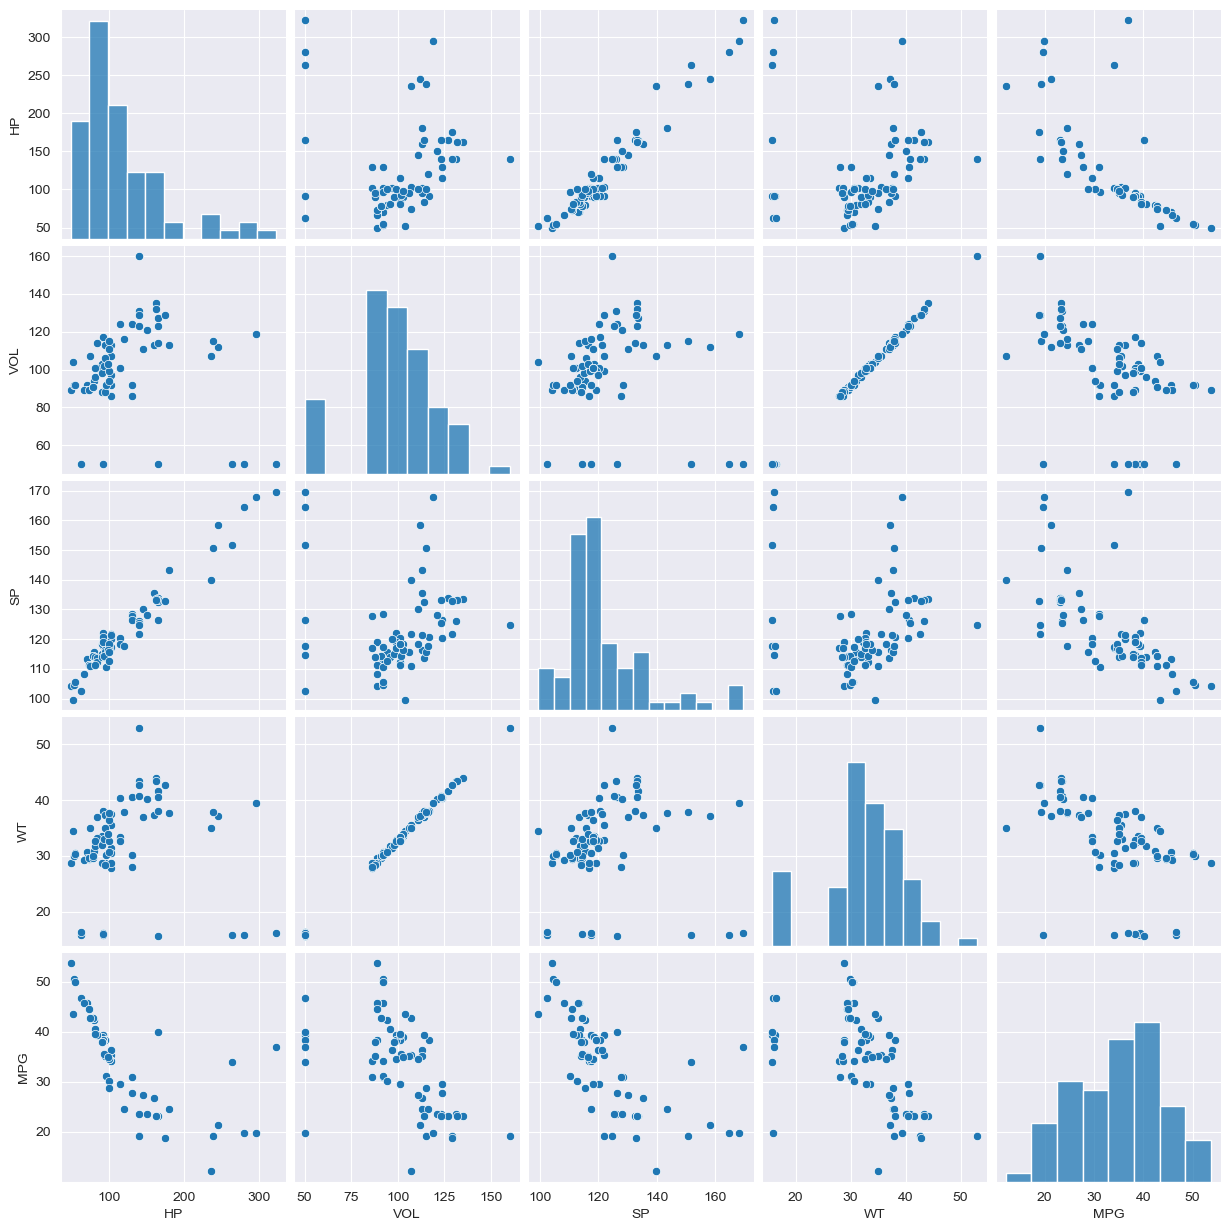

In [15]:
sns.set_style(style = 'darkgrid')
sns.pairplot(cars)

In [18]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


### Observations
- The Higher correlation strength is observed bw HP and MPG (-0.725038)
- The Higher correlation strength is observed bw VOL and WT (0.999203)
- Between x and y ,all the x variables are showing moderate to high correlation strengths, highest being between HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG
- Among x columns (x1,x2,x3, and x4) some very high correlation strengths are observed between SP vs HP , VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

In [22]:
model1 = smf.ols('MPG~WT+VOL+SP+HP',data = cars).fit()

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:37:19   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""